# Installing Requirements


In [ ]:
!pip install scikit-learn
!pip install seaborn

In [ ]:
!pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.6 MB/s eta 0:00:00


In [ ]:
!pip install skillsnetwork


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.2 MB/s eta 0:00:00


# Downloading Dataset


In [ ]:
import skillsnetwork
await skillsnetwork.download_dataset("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX01JCEN/data/parkinsons.data")

Saved as 'parkinsons.data'


# Importing Libraries

In [ ]:
import skillsnetwork
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [ ]:
sns.set(style="whitegrid", color_codes=True)

# Confusion Matrix Plotting


In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  thresh = 3*cm.max()/4
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Loading Data

In [ ]:
data = pd.read_csv('parkinsons.data', sep=',', index_col='name')
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
print(data.shape)

(195, 23)


## Correlation Matrix

<Axes: >

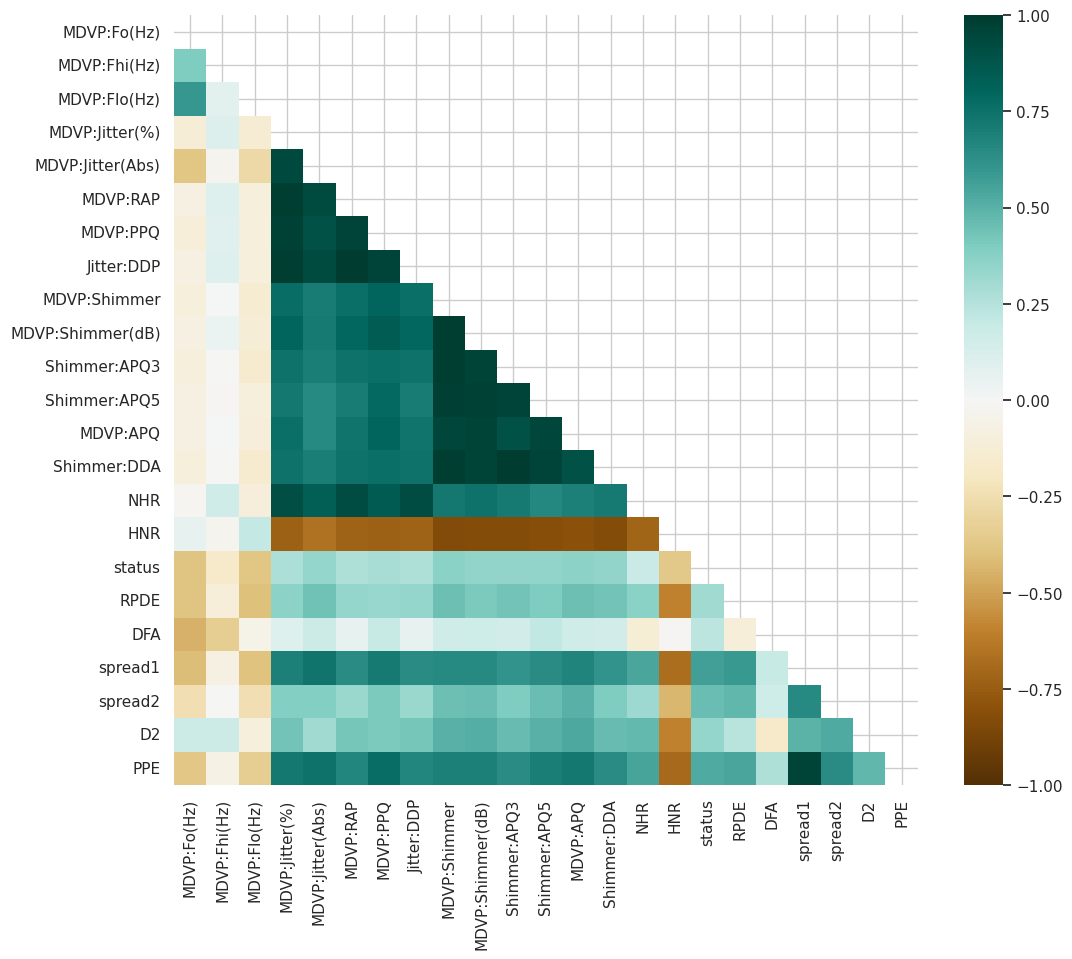

In [ ]:
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
sns.heatmap(data.corr(),vmin=-1, vmax=1,cmap='BrBG', mask=mask)

Text(0.5, 1.0, 'Features Correlating with Parkinson existance')

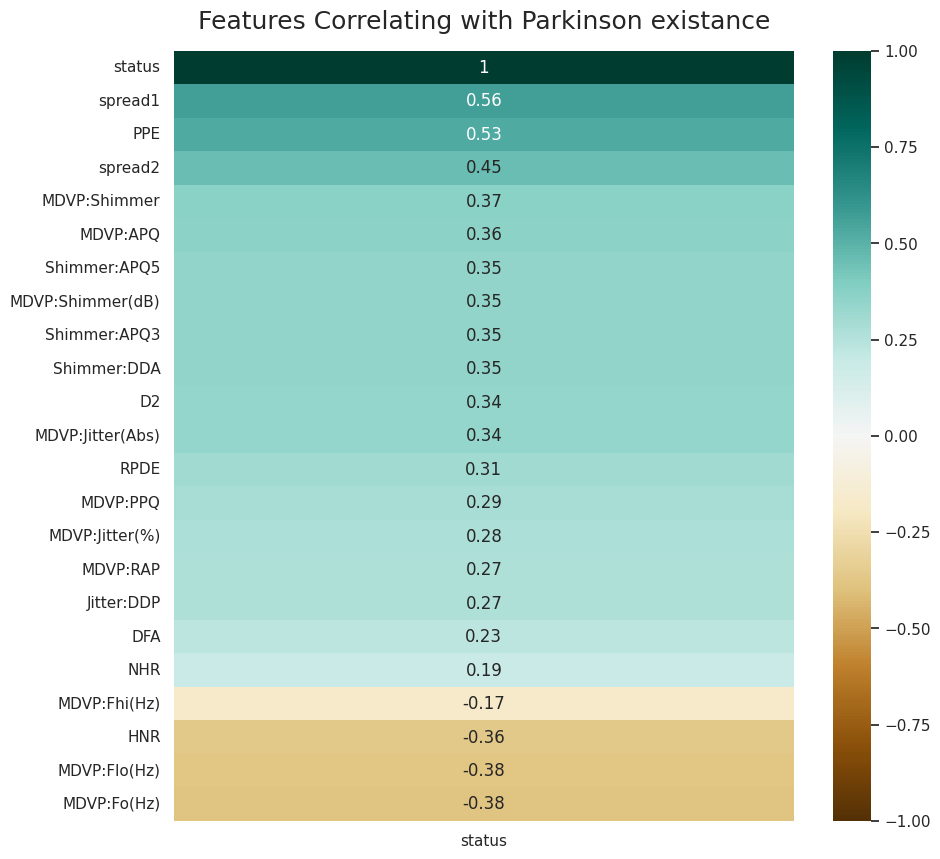

In [ ]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(data.corr()[['status']].sort_values(by='status', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Parkinson existance', fontdict={'fontsize':18}, pad=16)

In [ ]:
X = data.drop('status', axis=1) #axis=1 to show that we are removing the columns

In [ ]:
y=data['status']
y.head()

,status
name,
phon_R01_S01_1,1
phon_R01_S01_2,1
phon_R01_S01_3,1
phon_R01_S01_4,1
phon_R01_S01_5,1


In [ ]:
y.value_counts(normalize=True)

,proportion
status,
1,0.753846
0,0.246154


**t-SNE (t-Distributed Stochastic Neighbor Embedding) is a machine learning technique used for dimensionality reduction and visualization of high-dimensional datasets**

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42) #Apply tSNE to reduce dimentionality to 2
X_tsne = tsne.fit_transform(X)

tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values

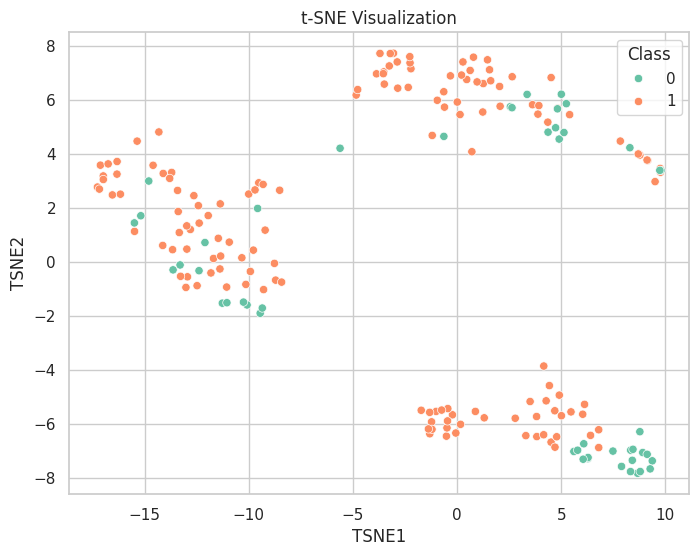

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2')
plt.title('t-SNE Visualization')
plt.show()

# Split the Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (156, 22)
y_train shape:  (156,)
X_test shape:  (39, 22)
y_test shape:  (39,)


## k-Nearest Neighbors (k-NN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#knn.predict_proba(X_test)[0:10]

Confusion matrix, without normalization
[[ 5  2]
 [ 4 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.71      0.62         7
           1       0.93      0.88      0.90        32

    accuracy                           0.85        39
   macro avg       0.74      0.79      0.76        39
weighted avg       0.87      0.85      0.85        39


Accuracy Score: 0.8461538461538461


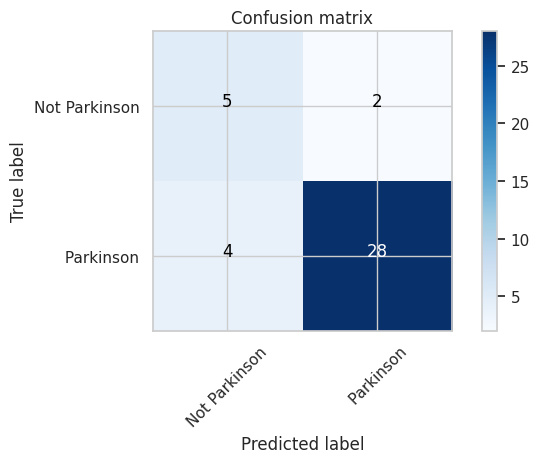

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

## FIND THE K VALUE FOR OPTIMAL RESULTS USING GridSearch CV

In [ ]:
param_grid = {'n_neighbors': [3, 5, 7, 9],}

In [ ]:
knn2 = KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn2, param_grid, scoring='recall', cv=5)
grid_search

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='recall')

In [ ]:
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'n_neighbors': 9}
Best Score:  0.9826086956521738


In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall

0.9375

Confusion matrix, without normalization
[[ 32  16]
 [  5 142]]


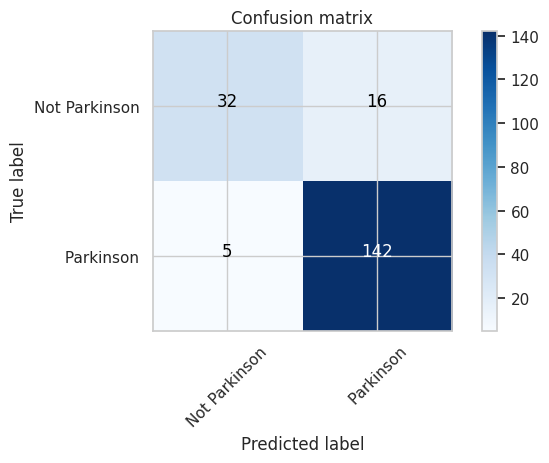

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X,y)
y_hat =knn.predict(X)
plot_confusion_matrix(confusion_matrix(y, y_hat),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')

In [ ]:
tsne_df['label']=''
tsne_df['label'].iloc[np.where((y_hat == 1) & (y == 1))]="TP"
# find true negatives (tn)
tsne_df['label'].iloc[np.where((y_hat == 0) & (y == 0))]="TN"
# find false positives (fp)
tsne_df['label'].iloc[np.where((y_hat == 1) & (y == 0))]="FP"
# find false negatives (fp)
tsne_df['label'].iloc[np.where((y_hat == 0) & (y == 1))]="FN"

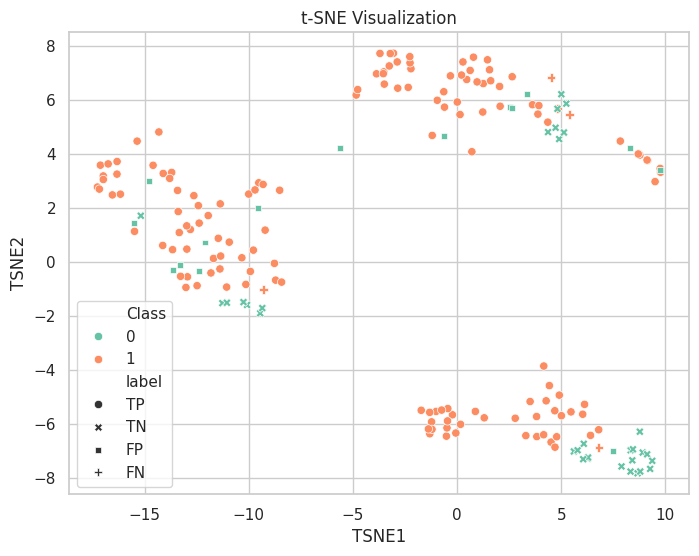

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2',style='label')
plt.title('t-SNE Visualization')
plt.show()

## **RANDOM FOREST MODEL**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=123)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 94.87%


In [38]:
!git clone https://github.com/joy-boy-21/Parkinson-s-Detection.git

Cloning into 'Parkinson-s-Detection'...
